In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso , Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Checking for Missing Values

In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

So there is no missing values in the data.
Now , Check for the duplicate records

In [6]:
df.duplicated().sum()

0

There is no duplicate values in the data

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


There are many values that are in Object data type and will not be accepted by the algorithm, so we have to encode them.

In [9]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [10]:
numerical_columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [11]:
categorical_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [12]:
for i in categorical_columns:
    print(i)
    print(df[i].unique())
    print("-" * 30)

mainroad
['yes' 'no']
------------------------------
guestroom
['no' 'yes']
------------------------------
basement
['no' 'yes']
------------------------------
hotwaterheating
['no' 'yes']
------------------------------
airconditioning
['yes' 'no']
------------------------------
prefarea
['yes' 'no']
------------------------------
furnishingstatus
['furnished' 'semi-furnished' 'unfurnished']
------------------------------


## Handle the Object type features and covert them into numerical data

In [13]:
df['mainroad'] = df['mainroad'].replace({'yes':1,'no':0}).astype(int)
df['guestroom'] = df['guestroom'].replace({'yes':1,'no':0}).astype(int)
df['basement'] = df['basement'].replace({'yes':1,'no':0}).astype(int)
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes':1,'no':0}).astype(int)
df['airconditioning'] = df['airconditioning'].replace({'yes':1,'no':0}).astype(int)
df['prefarea'] = df['prefarea'].replace({'yes':1,'no':0}).astype(int)
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished':2,'semi-furnished':1, 'unfurnished':0 }).astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


## EDA

In [15]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


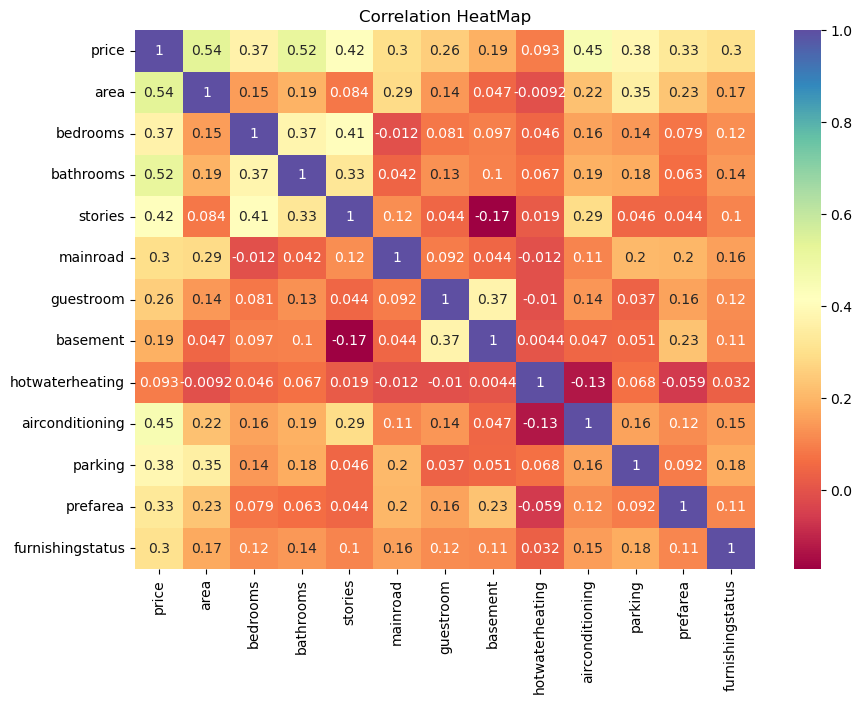

In [16]:
plt.figure(figsize = (10, 7))
sb.heatmap(df.corr() , annot = True , cmap = "Spectral")
plt.title('Correlation HeatMap')
plt.show()

Mostly all the features are good to go for the training

## Check for Outliers in the target column and handle them

<Axes: xlabel='price'>

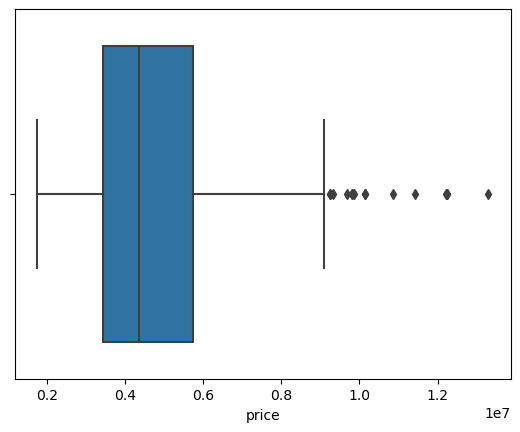

In [17]:
sb.boxplot(x=df["price"])

In [18]:
df_iqr = df
Q1 = df_iqr.quantile(0.25)
Q3 = df_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price               2310000.0
area                   2760.0
bedrooms                  1.0
bathrooms                 1.0
stories                   1.0
mainroad                  0.0
guestroom                 0.0
basement                  1.0
hotwaterheating           0.0
airconditioning           1.0
parking                   1.0
prefarea                  0.0
furnishingstatus          2.0
dtype: float64


In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
iqr = Q3 - Q1

In [20]:
upper_bound = Q3 + 3 * iqr
lower_bound = Q1 - 3 * iqr

In [21]:
print(upper_bound , lower_bound)

12670000.0 -3500000.0


In [22]:
df = df[(df['price'] <= upper_bound) | (df['price'] >=  lower_bound)]

In [23]:
df = df[(df["price"] < upper_bound) & (df["price"] > lower_bound)]

## Split the data into Dependent and Independent variables

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1


In [25]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

## Further Split the data for Training and Testing

In [26]:
X_train, X_test , y_train , y_test = train_test_split(X , y , random_state= 80)

### Random Forest Regressor

In [27]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
X_train_pred = rfr.predict(X_train)
print("MSE: ",mean_squared_error(y_train, X_train_pred))
print("R2 Score: ", r2_score(y_train , X_train_pred))
print("MAE: ",mean_absolute_error(y_train , X_train_pred))

MSE:  194206809091.55005
R2 Score:  0.9387725813390608
MAE:  306873.2407679738


In [28]:
print("Training Score: ", rfr.score(X_train , y_train))
print("Testing Score: ", rfr.score(X_test , y_test))

Training Score:  0.9387725813390608
Testing Score:  0.667598875712921


### Linear Regression

In [29]:
lr = LinearRegression()
lr.fit(X_train , y_train)
X_train_lr = lr.predict(X_train)
print("MSE: ",mean_squared_error(y_train, X_train_lr))
print("R2 Score: ", r2_score(y_train , X_train_lr))
print("MAE: ",mean_absolute_error(y_train , X_train_lr))

MSE:  1088571701055.3613
R2 Score:  0.6568069080855554
MAE:  771294.0650356144


In [30]:
print("Training Score: ", lr.score(X_train , y_train))
print("Testing Score: ", lr.score(X_test , y_test))

Training Score:  0.6568069080855554
Testing Score:  0.7215439788633256


### Ridge Regression

In [31]:
rid = Ridge()
rid.fit(X_train , y_train)
X_train_rid = rid.predict(X_train)
print("MSE: ",mean_squared_error(y_train, X_train_rid))
print("R2 Score: ", r2_score(y_train , X_train_rid))
print("MAE: ",mean_absolute_error(y_train , X_train_rid))

MSE:  1088681179481.5328
R2 Score:  0.6567723929134824
MAE:  770319.422068974


In [32]:
print("Training Score: ", rid.score(X_train , y_train))
print("Testing Score: ", rid.score(X_test , y_test))

Training Score:  0.6567723929134824
Testing Score:  0.7201674682456005


### Lasso Regression

In [33]:
las = Lasso(alpha=0.01)
las.fit(X_train , y_train)
X_train_las = las.predict(X_train)
print("MSE: ",mean_squared_error(y_train, X_train_las))
print("R2 Score: ", r2_score(y_train , X_train_las))
print("MAE: ",mean_absolute_error(y_train , X_train_las))

MSE:  1088571701055.3665
R2 Score:  0.6568069080855539
MAE:  771294.0577279652


In [34]:
print("Training Score: ", las.score(X_train , y_train))
print("Testing Score: ", las.score(X_test , y_test))

Training Score:  0.6568069080855539
Testing Score:  0.721543968066267


### Adaboost Regressor

In [35]:
abr = AdaBoostRegressor()
abr.fit(X_train , y_train)
X_train_abr = abr.predict(X_train)
print("MSE: ",mean_squared_error(y_train, X_train_abr))
print("R2 Score: ", r2_score(y_train , X_train_abr))
print("MAE: ",mean_absolute_error(y_train , X_train_abr))

MSE:  1021143404082.4718
R2 Score:  0.6780649710116965
MAE:  812847.3222888965


In [36]:
print("Training Score: ", abr.score(X_train , y_train))
print("Testing Score: ", abr.score(X_test , y_test))

Training Score:  0.6780649710116965
Testing Score:  0.6297368945270062


### So as per the above result we can clearly see that our model is performing Overfitting on Random Forest.
### So we will go with AdaBoost Regressor

## Conclusion: Here Our Adaboost regressor Performing well in all with the Accuracy of 67.80%